In [1]:
import numpy as np
import matplotlib.pyplot as plt
import awkward0 as awkward
import uproot3_methods as uproot_methods
import uproot3 as uproot

In [2]:
tree = uproot.open('data/Run2012B_SingleMu_1000.root')['Events']
electron_pdg = 11 * -tree['Electron_charge'].array()
electron_p4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(tree['Electron_pt'].array(), tree['Electron_eta'].array(), tree['Electron_phi'].array(), tree['Electron_mass'].array())
muon_pdg = 13 * -tree['Muon_charge'].array()
muon_p4 = uproot_methods.TLorentzVectorArray.from_ptetaphim(tree['Muon_pt'].array(), tree['Muon_eta'].array(), tree['Muon_phi'].array(), tree['Muon_mass'].array())
lepton_pdg = awkward.concatenate((electron_pdg, muon_pdg), axis=1)
lepton_p4 = awkward.concatenate((electron_p4, muon_p4), axis=1)
lepton_indices = lepton_pdg.argchoose(2).unzip()
dilepton_indices_mask = lepton_pdg[lepton_indices[0]] == -lepton_pdg[lepton_indices[1]]
dilepton_mass = (lepton_p4[lepton_indices[0][dilepton_indices_mask]] + lepton_p4[lepton_indices[1][dilepton_indices_mask]]).mass
best_dilepton_index = abs(dilepton_mass - 91.2).argmin()
event_mask = (lepton_pdg.count() >= 3) & (lepton_indices[0][dilepton_indices_mask].count() > 0)
leading_lepton_indices = lepton_p4[event_mask].pt.argsort()
leading_lepton_indices_mask = (leading_lepton_indices != lepton_indices[0][dilepton_indices_mask][best_dilepton_index][event_mask].flatten()) & (leading_lepton_indices != lepton_indices[1][dilepton_indices_mask][best_dilepton_index][event_mask].flatten())
leading_other_lepton_index = leading_lepton_indices[leading_lepton_indices_mask][:, :1]
leading_other_lepton_p4 = lepton_p4[event_mask][leading_other_lepton_index].flatten()
met_pt = tree['MET_pt'].array()
met_phi = tree['MET_phi'].array()
met = uproot_methods.TVector2Array.from_polar(met_pt, met_phi)[event_mask]
result = np.sqrt(2 * leading_other_lepton_p4.pt * met_pt[event_mask] * (1 - np.cos(leading_other_lepton_p4.delta_phi(met))))

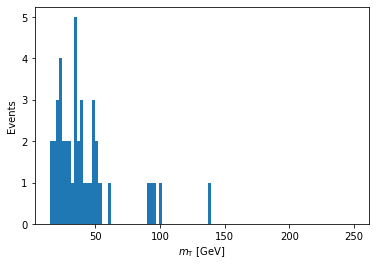

In [3]:
n, bins, _ = plt.hist(result, 100, (15, 250))
plt.xlabel(r'$m_\mathrm{T}$ [GeV]')
plt.ylabel('Events')
plt.show()

In [4]:
np.stack((bins[:-1], bins[1:], n), axis=1)

array([[ 15.        ,  17.35000038,   2.        ],
       [ 17.35000038,  19.70000076,   2.        ],
       [ 19.70000076,  22.04999924,   3.        ],
       [ 22.04999924,  24.39999962,   4.        ],
       [ 24.39999962,  26.75      ,   2.        ],
       [ 26.75      ,  29.10000038,   2.        ],
       [ 29.10000038,  31.45000076,   2.        ],
       [ 31.45000076,  33.79999924,   1.        ],
       [ 33.79999924,  36.15000153,   5.        ],
       [ 36.15000153,  38.5       ,   2.        ],
       [ 38.5       ,  40.84999847,   3.        ],
       [ 40.84999847,  43.20000076,   1.        ],
       [ 43.20000076,  45.54999924,   1.        ],
       [ 45.54999924,  47.90000153,   1.        ],
       [ 47.90000153,  50.25      ,   3.        ],
       [ 50.25      ,  52.59999847,   2.        ],
       [ 52.59999847,  54.95000076,   1.        ],
       [ 54.95000076,  57.29999924,   0.        ],
       [ 57.29999924,  59.65000153,   0.        ],
       [ 59.65000153,  62.     